In [1]:
import ROOT as rt
import math

Welcome to JupyROOT 6.18/04


In [2]:
input_file = rt.TFile("../online/output/ssbar_triple_cor.root")
input_list = input_file.Get("strangeMC")
main_canv = rt.TCanvas("main_canv", "Main Canvas")

In [3]:
triple_cor = input_list.FindObject("triple_Cor")
fixed_triple_cor = input_list.FindObject("fixedTriple_Cor")

# Pt Distribution Section

## Any trigger section (could have multiple triggers per event)

In [4]:
low, high = 4, 5
triple_cor.GetAxis(0).SetRangeUser(low, high)
triple_cor_pt_proj = triple_cor.Clone("triple_cor_pt_proj").Projection(3, 1)
triple_cor_pt_proj.SetTitle(f"#Lambda^{{0}}-K^{{+}} Pt Dist with {low} < p_{{T}}^{{trigger}} < {high}")
triple_cor_pt_proj.GetXaxis().SetTitle("p_{T}^{#Lambda^{0}}")
triple_cor_pt_proj.GetYaxis().SetTitle("p_{T}^{K^{+}}")

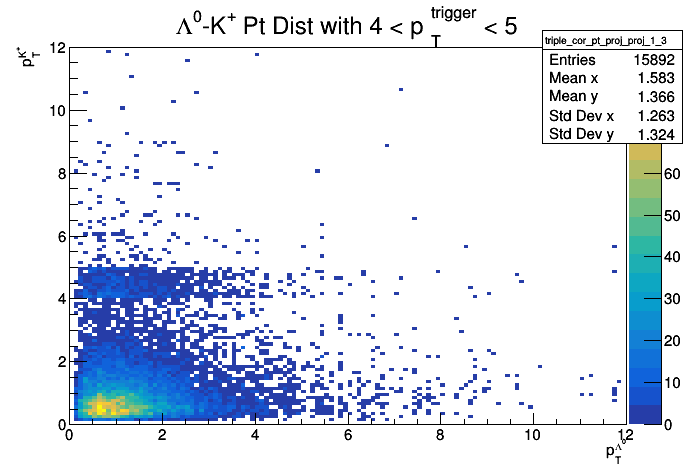

In [5]:
main_canv.cd()
triple_cor_pt_proj.Draw("COLZ")
main_canv.Draw()

## Fixed trigger section (one trigger per event)

In [6]:
low, high = 4, 5
fixed_triple_cor.GetAxis(0).SetRangeUser(low, high)
fixed_triple_cor_pt_proj = fixed_triple_cor.Clone("fixed_triple_cor_pt_proj").Projection(3, 1)
fixed_triple_cor_pt_proj.SetTitle(f"#Lambda^{{0}}-K^{{+}} p_{{T}} Dist with {low} < p_{{T}}^{{trigger}} < {high}")
fixed_triple_cor_pt_proj.GetXaxis().SetTitle("p_{T}^{#Lambda^{0}}")
fixed_triple_cor_pt_proj.GetYaxis().SetTitle("p_{T}^{K^{+}}")

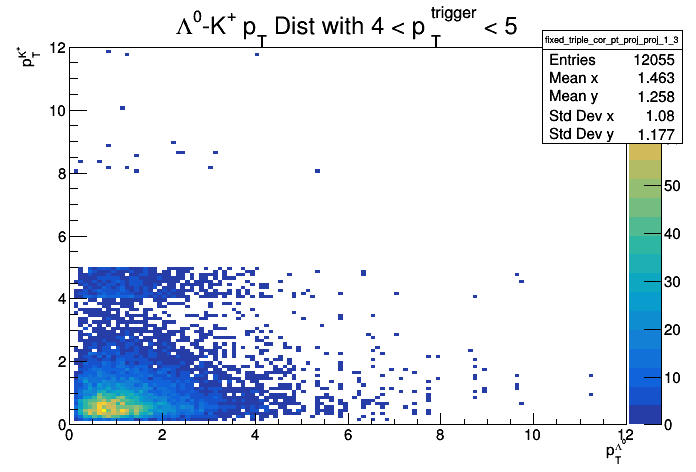

In [7]:
main_canv.cd()
fixed_triple_cor_pt_proj.Draw("COLZ")
main_canv.Draw()

A couple of things to note:
   * Requiring one trigger between 4 and 8 GeV puts a hard cap on where the K can fall in this distribution
   * If I were to change the 4 to 8 GeV requirement online, then I would end up requring events with only 1 charged hadron in a very loose pt range... Maybe add ANOTHER axis with number of triggers/event?
   

In [8]:
# Reset the trigger pt range
triple_cor.GetAxis(0).SetRangeUser(0, 0)

# Correlation Section

In [19]:
# Playing with pt ranges of trigger, lambda and k+
trigger_low, trigger_high = 7, 8
lambda_low, lambda_high = 0, 0
k_low, k_high = 0, 0
triple_cor.GetAxis(0).SetRangeUser(trigger_low, trigger_high)
triple_cor.GetAxis(1).SetRangeUser(lambda_low, lambda_high)
triple_cor.GetAxis(3).SetRangeUser(k_low, k_high)

## Trigger-lambda delta-phi distribution

In [20]:
trigger_lambda_dphi = triple_cor.Clone("trigger_lambda_dphi").Projection(2)
trigger_lambda_dphi.Sumw2()
trigger_lambda_dphi.SetTitle("Trigger-#Lambda^{0} #Delta#varphi")
trigger_lambda_dphi.GetXaxis().SetTitle("#Delta#varphi")
trigger_lambda_dphi.GetYaxis().SetTitle("dN/d#Delta#varphi")
trigger_lambda_dphi.SetLineColor(1)
trigger_lambda_dphi.SetMarkerColor(1)
trigger_lambda_dphi.SetMarkerStyle(22)

Warning in <TFile::Append>: Replacing existing TH1: trigger_lambda_dphi_proj_2 (Potential memory leak).


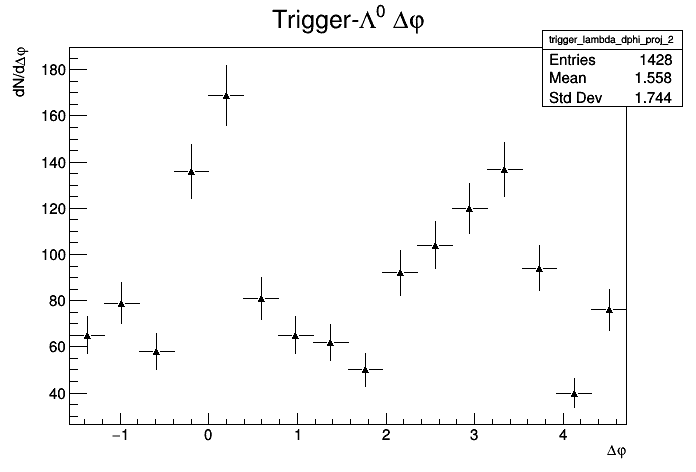

In [21]:
main_canv.cd()
trigger_lambda_dphi.Draw()
main_canv.Draw()

## All section (lambdas in jet + lambdas out of jet)
Note: We still require at least one trigger (this is projected from sparse that has trigger Pt axis)

In [ ]:
triple_cor_dphi = triple_cor.Clone("triple_cor_dphi").Projection(4)
triple_cor_dphi.Sumw2()
triple_cor_dphi.SetTitle(f"All #Lambda^{{0}}-K^{{+}} #Delta#varphi (-#pi/2 < #Delta#varphi_{{trigger-#Lambda}} < 3#pi/2)")
triple_cor_dphi.GetXaxis().SetTitle("#Delta#varphi")
triple_cor_dphi.GetYaxis().SetTitle("dN/d#Delta#varphi")
triple_cor_dphi.SetLineColor(4)
triple_cor_dphi.SetMarkerColor(4)
triple_cor_dphi.SetMarkerStyle(22)

In [ ]:
main_canv.cd()
triple_cor_dphi.Draw()
main_canv.Draw()

## In jet section

In [ ]:
injet_width = math.pi/4
triple_cor.GetAxis(2).SetRangeUser(-math.pi/8, math.pi/8)
triple_cor_injet_dphi = triple_cor.Clone("triple_cor_injet_dphi").Projection(4)
triple_cor_injet_dphi.Sumw2()
triple_cor_injet_dphi.SetTitle(f"In jet #Lambda^{{0}}-K^{{+}} #Delta#varphi (-#pi/8 < #Delta#varphi_{{trigger-#Lambda}} < #pi/8)")
triple_cor_injet_dphi.GetXaxis().SetTitle("#Delta#varphi")
triple_cor_injet_dphi.GetYaxis().SetTitle("dN/d#Delta#varphi")
triple_cor_injet_dphi.SetLineColor(6)
triple_cor_injet_dphi.SetMarkerColor(6)
triple_cor_injet_dphi.SetMarkerStyle(22)

In [ ]:
main_canv.cd()
triple_cor_injet_dphi.Draw()
main_canv.Draw()

In [ ]:
# Reset ranges of trigger-lambda dphi
triple_cor.GetAxis(2).SetRangeUser(0, 0)

## Out of jet section

In [12]:
# This is a tricky idea, can play around with both sections (left and right of jet) but for now just do single side
triple_cor.GetAxis(2).SetRange(7, 9)
triple_cor_outjet_dphi = triple_cor.Clone("triple_cor_outjet_dphi").Projection(4)
triple_cor_outjet_dphi.Sumw2()
triple_cor_outjet_dphi.SetTitle(f"Out of jet #Lambda^{{0}}-K^{{+}} #Delta#varphi (1 < #Delta#varphi_{{trigger-#Lambda}} < 2)")
triple_cor_outjet_dphi.GetXaxis().SetTitle("#Delta#varphi")
triple_cor_outjet_dphi.GetYaxis().SetTitle("dN/d#Delta#varphi")
triple_cor_outjet_dphi.SetLineColor(2)
triple_cor_outjet_dphi.SetMarkerColor(2)
triple_cor_outjet_dphi.SetMarkerStyle(22)

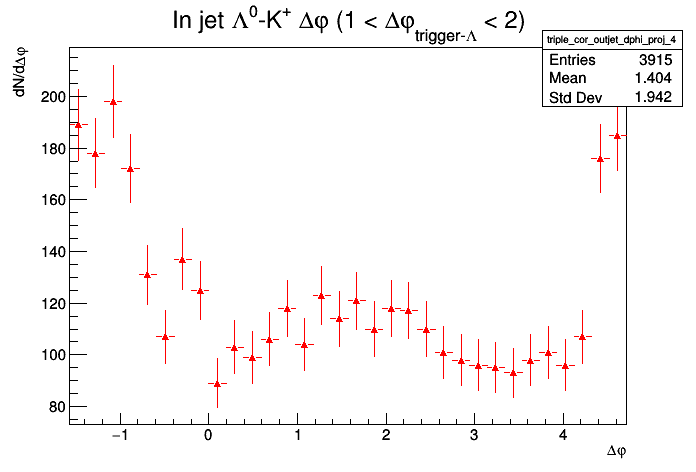

In [15]:
main_canv.cd()
triple_cor_outjet_dphi.Draw()
main_canv.Draw()